In [2]:
# For data analysis:
import numpy as np
import pandas as pd

# Graphs/Visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For Statistics and Hypothesis Testing:
import scipy.stats as stats

# For Modeling:
from itertools import combinations
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

# For acquiring the dataset(note - your credentials will work if stored in an env.py file):
from acquire import get_zillow_data

# For preparing and cleaning as well as splitting and encoding the dataset
# and splitting into new df, X_train_exp, X_train, y_train, X_validate, y_validate, X_test, y_test:
import wrangle

# For splitting the dataset into Train, Validate and Test sets:
from splitter import splitter

# For running bivariate and multivariate graphical comparisons
import explore

# For evaluating regression models
import evaluate

# For comparing regression model outcomes
import model_comparator

#Ignore Warnings:
import warnings
warnings.filterwarnings('ignore')

# reloads import files each time a cell is ran
%load_ext autoreload
%autoreload 2

In [5]:
df_raw = get_zillow_data()
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52442 entries, 0 to 52441
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52442 non-null  int64  
 1   id                            52442 non-null  int64  
 2   logerror                      52442 non-null  float64
 3   transactiondate               52442 non-null  object 
 4   id.1                          52442 non-null  int64  
 5   airconditioningtypeid         13638 non-null  float64
 6   architecturalstyletypeid      70 non-null     float64
 7   basementsqft                  47 non-null     float64
 8   bathroomcnt                   52442 non-null  float64
 9   bedroomcnt                    52442 non-null  float64
 10  buildingclasstypeid           0 non-null      float64
 11  buildingqualitytypeid         33741 non-null  float64
 12  calculatedbathnbr             52305 non-null  float64
 13  d

In [22]:
df, X_train_exp, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.full_wrangle(df_raw)

Features removed: 
['parcelid', 'id', 'id.1', 'airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'buildingclasstypeid', 'buildingqualitytypeid', 'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'heatingorsystemtypeid', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertylandusetypeid', 'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories', 'fireplaceflag', 'assessmentyear', 'taxdelinquencyflag', 'taxdelinquencyyear', 'censustractandblock', 'logerror.1', 'transactiondate.1']

-----
Columns reduced by 29 to 35, and rows red

In [33]:
X_train_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25465 entries, 32415 to 45260
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transactiondate        25465 non-null  object 
 1   bedrooms               25465 non-null  int64  
 2   bathrooms              25465 non-null  float64
 3   sqft                   25465 non-null  int64  
 4   county                 25465 non-null  object 
 5   latitude               25465 non-null  float64
 6   longitude              25465 non-null  float64
 7   lotsize                25465 non-null  int64  
 8   landusecode            25465 non-null  object 
 9   yearbuilt              25465 non-null  int64  
 10  structurevalue         25465 non-null  int64  
 11  salesvalue             25465 non-null  int64  
 12  landvalue              25465 non-null  int64  
 13  taxamount              25465 non-null  int64  
 14  structure_value_ratio  25465 non-null  float64
 15

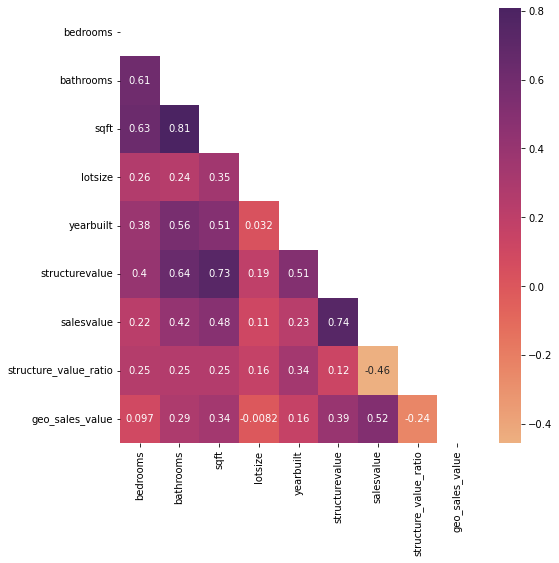

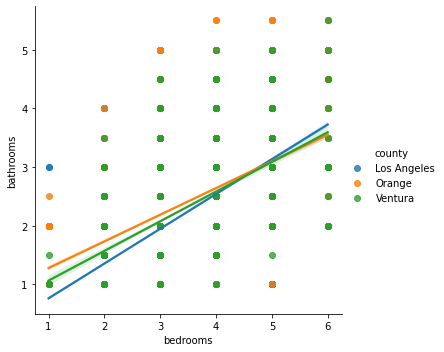

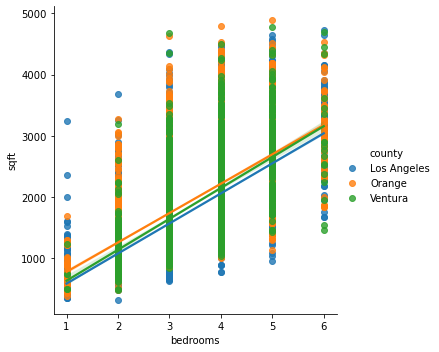

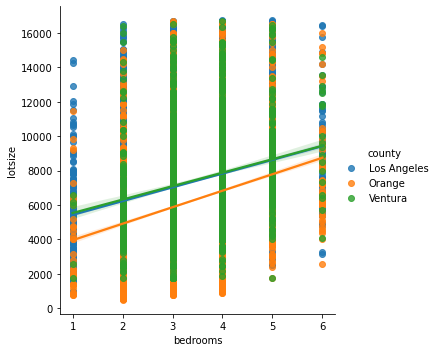

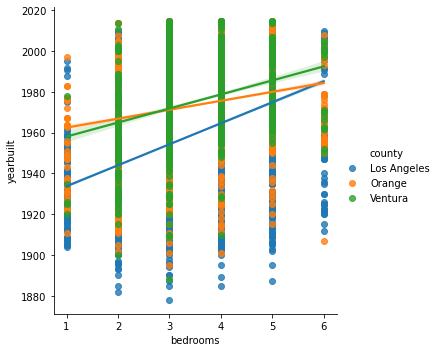

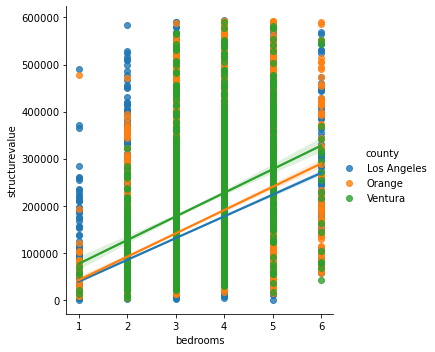

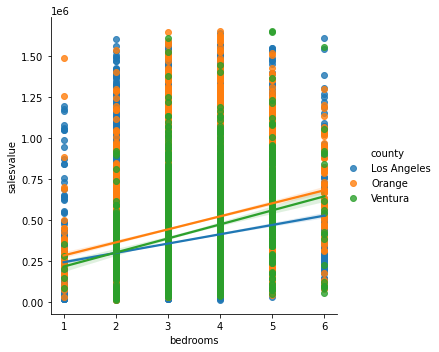

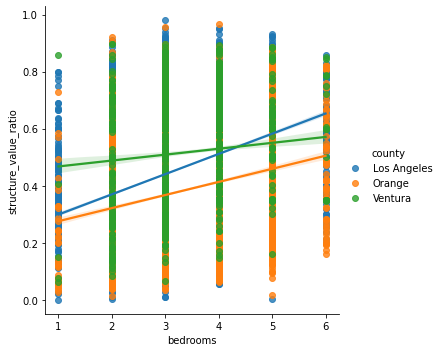

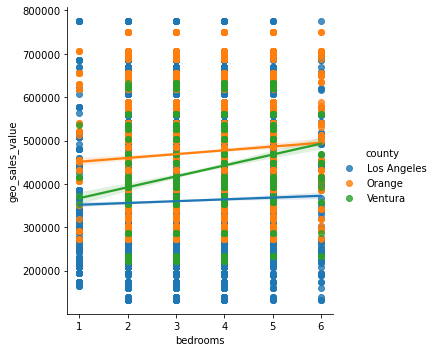

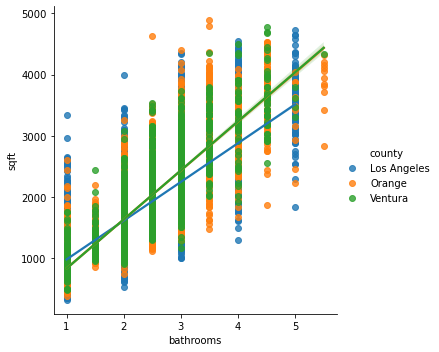

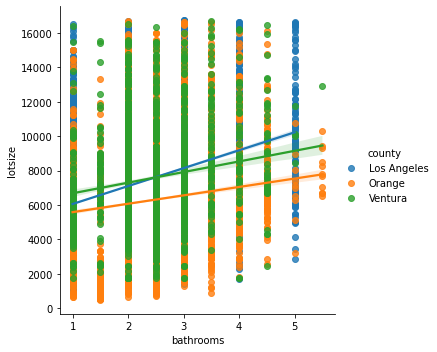

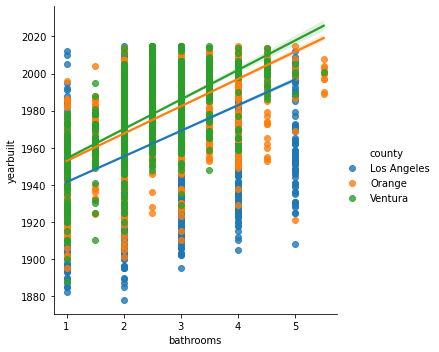

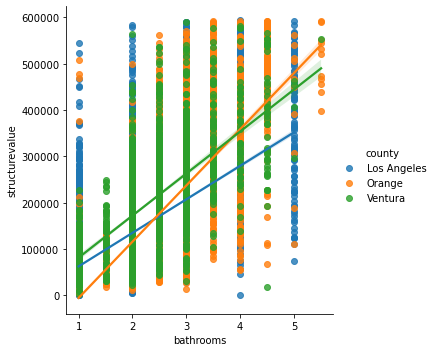

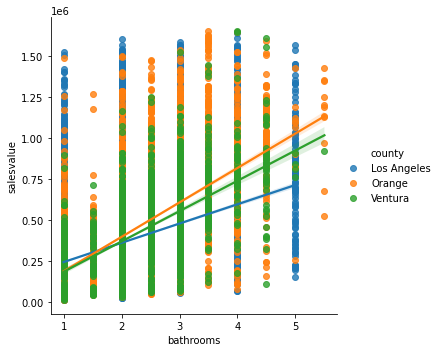

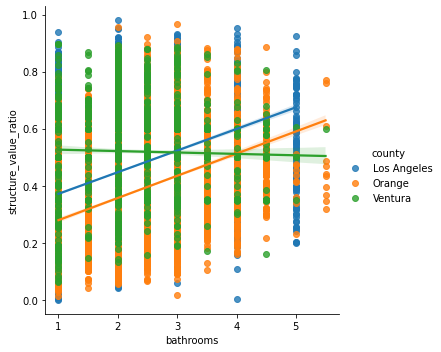

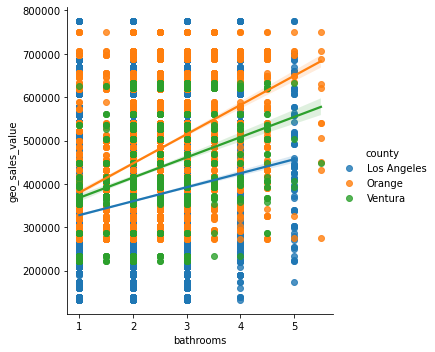

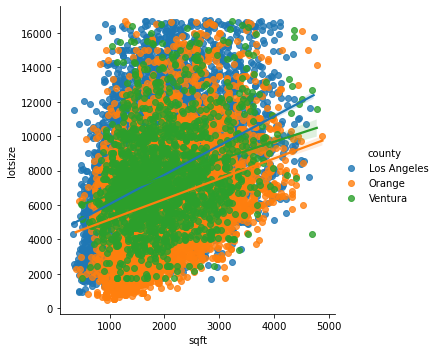

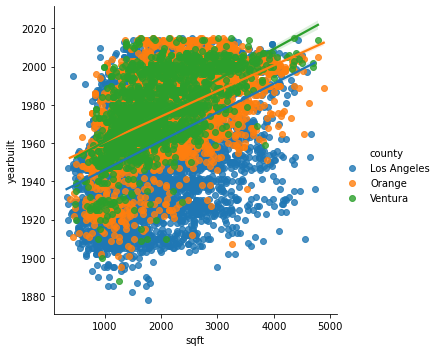

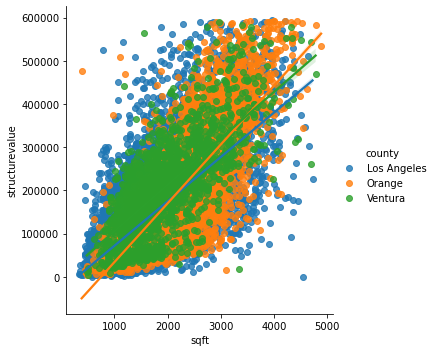

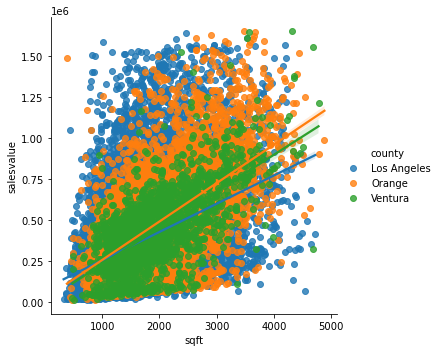

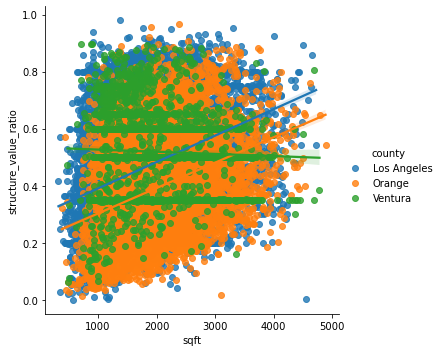

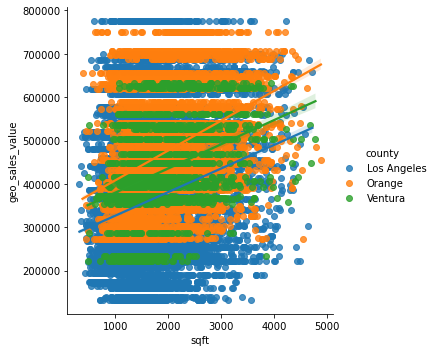

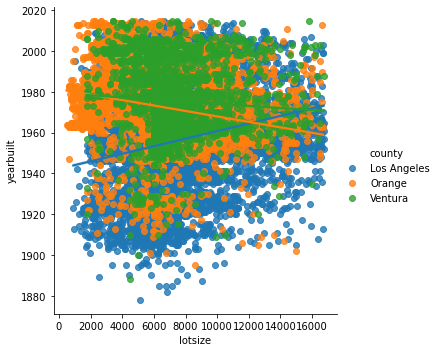

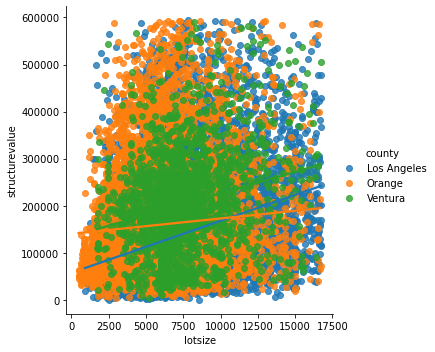

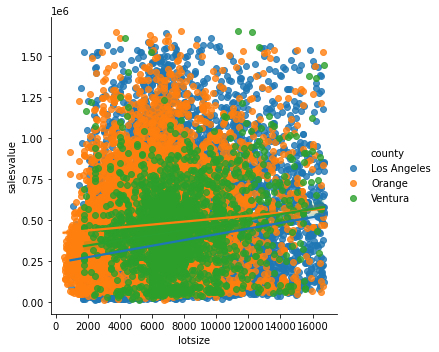

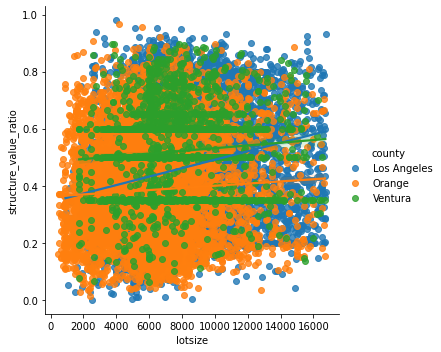

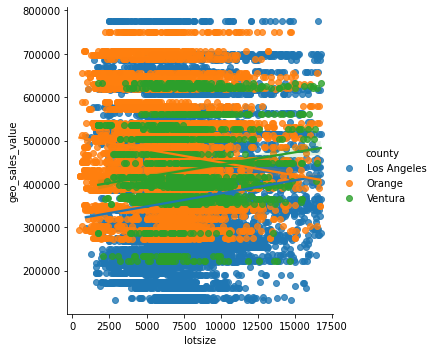

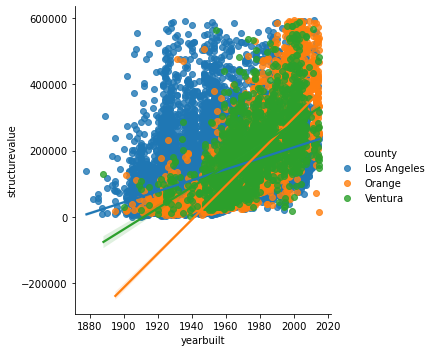

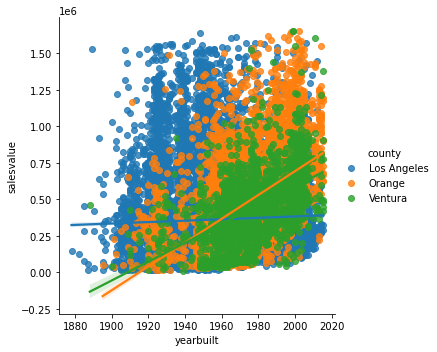

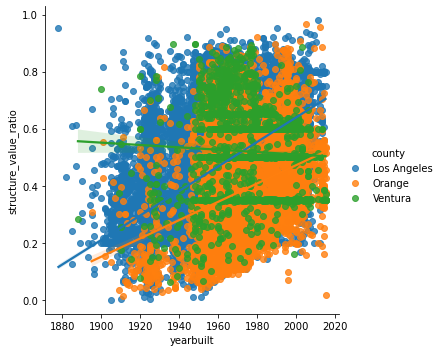

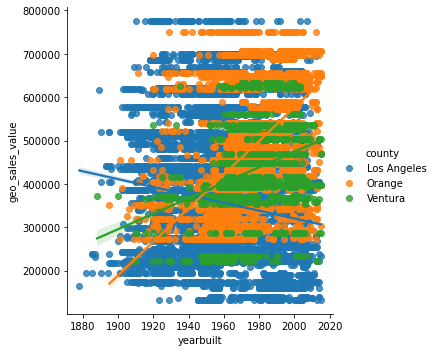

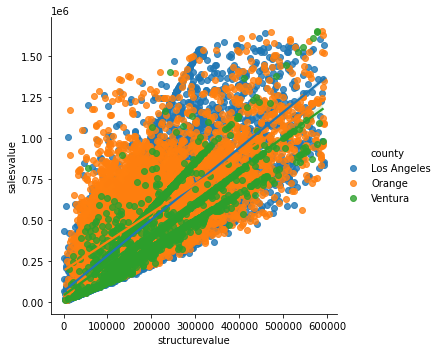

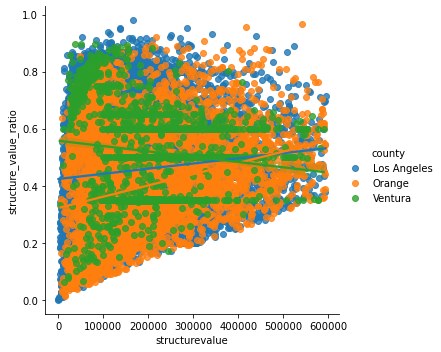

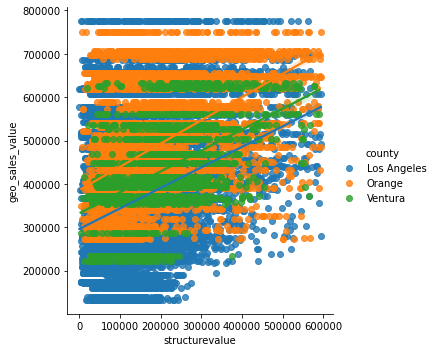

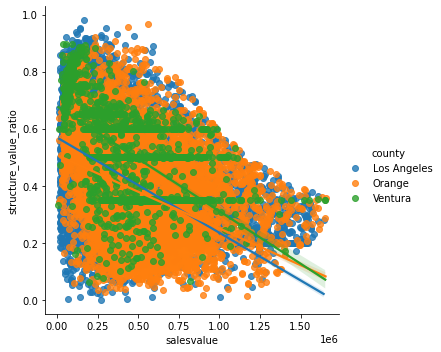

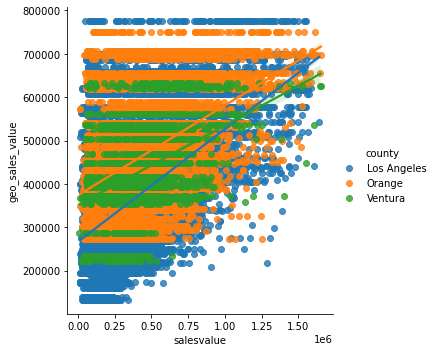

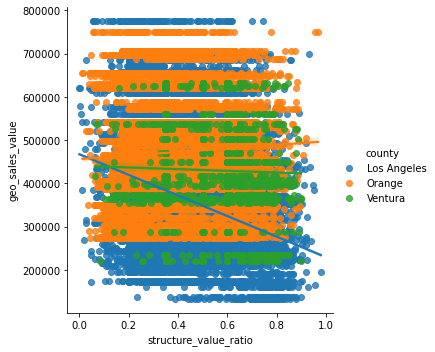

In [36]:
explore.plot_variable_pairs(X_train_exp.drop(columns = ['transactiondate','landvalue','taxamount','latitude','longitude','county_Los Angeles',
       'county_Orange', 'county_Ventura', 'landusecode_0100',
       'landusecode_0101', 'landusecode_0102', 'landusecode_0103',
       'landusecode_0104', 'landusecode_0108', 'landusecode_0109',
       'landusecode_010G', 'landusecode_010M', 'landusecode_0131',
       'landusecode_1', 'landusecode_1110', 'landusecode_1111',
       'landusecode_122']))